In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
path = './output/house_info.csv'
df = pd.read_csv(path)

In [3]:
# drop imported index column
df = df.drop(['Unnamed: 0'], axis=1)

## Exploration 

In [4]:
df.describe()

,price,beds,baths,size,zipcode
count,7.600000e+02,760.000000,760.000000,760.000000,760.000000
mean,9.996521e+05,3.425000,2.850000,2377.650000,75282.200000
std,3.694397e+06,1.243547,2.736303,2896.364876,366.469399
min,1.750000e+05,1.000000,1.000000,807.000000,75205.000000
25%,2.437500e+05,3.000000,2.000000,1558.500000,75215.500000
50%,3.522500e+05,3.000000,2.000000,1809.000000,75221.500000
75%,4.999248e+05,4.000000,3.000000,2265.750000,75232.000000
max,2.400000e+07,9.000000,19.000000,20000.000000,77568.000000


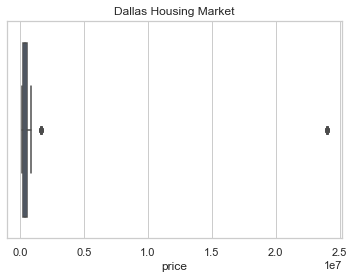

In [5]:
prices = df['price']
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=prices)
plt.title('Dallas Housing Market')
plt.show()

In [6]:
# remove extreme outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
houses = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Number of outliers: {len(df) - len(houses)}')

Number of outliers: 114


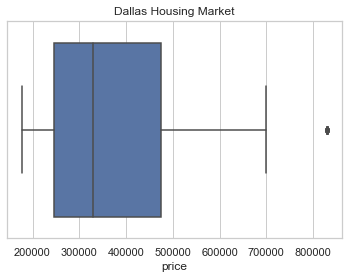

In [7]:
# boxplot without the outliers
prices = houses['price']
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=prices)
plt.title('Dallas Housing Market')
plt.show()

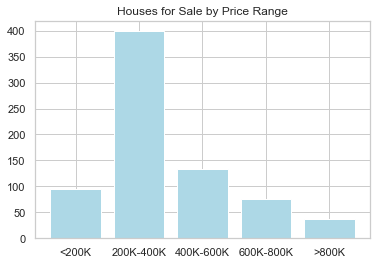

In [30]:
# Create bins for spending ranges and respective labels 
price_ranges = [0, 200000, 400000, 600000, 800000, 2000000]
spending_ranges = ["<200K", "200K-400K", "400K-600K", "600K-800K", ">800K"]
df['spending ranges'] = pd.cut(df["price"], price_ranges, labels=spending_ranges, include_lowest=False)

# count how many in each bin
count = df.groupby('spending ranges')['address'].count()
plt.bar(spending_ranges, count, color='lightblue')
plt.title('Houses for Sale by Price Range')
plt.show()

In [ ]:
# Most expensive zip codes 
